In [2]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [4]:
# dataDir='/dl/data/cityscapes/cityscapes_ori/leftImg8bit'
dataType='val'
dataDir='/media/pesong/e/dl_gaussian/data/coco/images/{}2017'.format(dataType)
# annDir ='/dl/data/cityscapes/4detectron/annotations/'

# annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
annFile='/media/pesong/e/dl_gaussian/data/coco/annotations/instances_{}2017.json'.format(dataType)

# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...


Done (t=0.69s)
creating index...
index created!


In [5]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format('.  '.join(nms))) 

# nms = set([cat['supercategory'] for cat in cats])
# print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person.  bicycle.  car.  motorcycle.  airplane.  bus.  train.  truck.  boat.  traffic light.  fire hydrant.  stop sign.  parking meter.  bench.  bird.  cat.  dog.  horse.  sheep.  cow.  elephant.  bear.  zebra.  giraffe.  backpack.  umbrella.  handbag.  tie.  suitcase.  frisbee.  skis.  snowboard.  sports ball.  kite.  baseball bat.  baseball glove.  skateboard.  surfboard.  tennis racket.  bottle.  wine glass.  cup.  fork.  knife.  spoon.  bowl.  banana.  apple.  sandwich.  orange.  broccoli.  carrot.  hot dog.  pizza.  donut.  cake.  chair.  couch.  potted plant.  bed.  dining table.  toilet.  tv.  laptop.  mouse.  remote.  keyboard.  cell phone.  microwave.  oven.  toaster.  sink.  refrigerator.  book.  clock.  vase.  scissors.  teddy bear.  hair drier.  toothbrush



[1]
2693
93717
000000093717.jpg


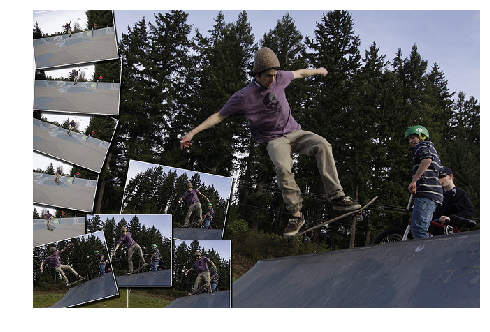

In [6]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person'])
print(catIds)
imgIds = coco.getImgIds(catIds=catIds)

print(len(imgIds))
# imgIds = coco.getImgIds(imgIds = [299553])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print(str(img['id']))

# load and display image
print(img['file_name'])

# for cityscapes
# dirName = str(img['file_name']).split('_')[0]
# I = io.imread('%s/%s/%s/%s'%(dataDir,dataType,dirName,img['file_name']))

I = io.imread('%s/%s'%(dataDir,img['file_name']))

# use url to load image
# I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


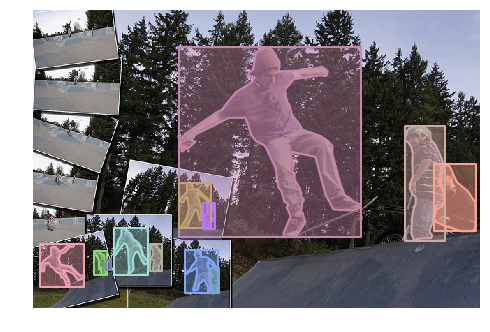

In [7]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds)
anns = coco.loadAnns(annIds)
print([ann['category_id'] for ann in anns])
# print([ann['bbox'] for ann in anns ])

coco.showAnns(anns, True)

In [13]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...


FileNotFoundError: [Errno 2] No such file or directory: '/media/pesong/e/dl_gaussian/data/coco/images/train2017/annotations/person_keypoints_train.json'

0

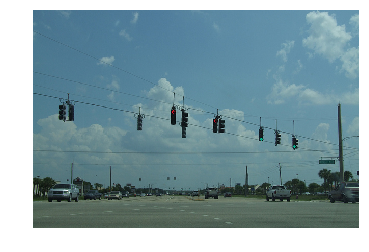

In [66]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [67]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!


A large and wide street covered in lots of traffic lights.
cars are stopped at a traffic light on a highway
Traffic is stopped at a red stop light.
A traffic light and intersection with cars traveling in both directions on the street.
A number of red and green traffic lights on a wide highway.


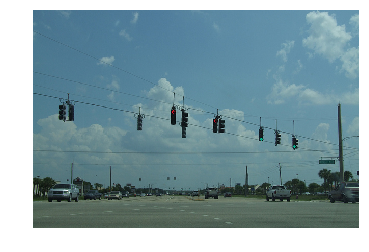

In [68]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()